In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler

/Users/zhangxinzhou/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
un_raw = pd.read_csv('un.csv')

In [3]:
un_raw.head()
#trf = total fertility rate 人口出生率

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
un_notnull = un_raw.dropna()
un_notnull.reset_index(drop=True, inplace=True)

In [5]:
un_notnull.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000
1,Bahamas,America,1.95,62.0,12.1,13.2,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000
2,Bahrain,Asia,2.97,53.0,12.6,13.3,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600
3,Belize,America,3.66,47.0,10.6,10.4,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472
4,Botswana,Africa,4.45,33.0,10.5,10.7,48.9,51.7,56.0,3640.0,75.4,41.7,19.500,40.100


In [6]:
un_num_data = un_notnull.iloc[:, 2:-1]
un_num_data.head()
un_std = StandardScaler().fit_transform(un_num_data)

In [7]:
pca = sklearnPCA(n_components=un_num_data.shape[1])
X_d = pca.fit_transform(un_num_data)
print X_d

[[ -3.61268487e+03  -8.71655463e+00  -3.50935558e+01  -9.28722087e+00
   -1.20379596e+01   3.72995468e-01   1.44015371e+00  -9.12333357e-01
    1.90259856e-01  -1.78486605e-01   1.12605521e-01]
 [  7.40136534e+03  -8.18608063e+00   2.58079101e+01   2.79889596e+00
    2.56892321e+00   4.74246385e+00  -1.41734150e+00   2.30036965e-01
    3.35535572e-02   1.28546516e-01  -1.45657427e-01]
 [  3.92935953e+03  -1.19211979e+01  -1.25405506e+01   5.72977598e+00
   -5.88077108e+00   1.03050662e+01   3.74270661e+00  -2.14023670e+00
    5.56141625e-02  -1.05072023e-01  -2.44252972e-01]
 [ -2.57465552e+03  -1.57442263e+01  -1.07852802e+01   6.22900839e+00
   -8.43330063e+00   1.79232341e-01  -5.67191798e+00  -1.22623952e+00
    1.09718062e+00   1.67997476e-01   3.17390728e-01]
 [ -1.50377048e+03   2.35364635e+01  -3.42687868e+00   1.03671438e+00
    5.86214235e+00  -3.27794421e+00   1.77125135e+01  -2.58325456e-01
    2.29033238e+00   1.07222075e-01  -2.44397546e-01]
 [ -4.97893633e+03   8.0187308

In [8]:
print pca.explained_variance_ratio_

[  9.99949070e-01   3.52469453e-05   7.07018111e-06   4.15126769e-06
   2.73857721e-06   1.18670377e-06   4.23673688e-07   7.70400625e-08
   2.86204519e-08   4.42404351e-09   2.62890017e-09]


In [9]:
pca1 = sklearnPCA(n_components=2)
X_d1 = pca1.fit_transform(un_num_data)
print X_d1

[[ -3.61268487e+03  -8.71655463e+00]
 [  7.40136534e+03  -8.18608063e+00]
 [  3.92935953e+03  -1.19211979e+01]
 [ -2.57465552e+03  -1.57442263e+01]
 [ -1.50377048e+03   2.35364635e+01]
 [ -4.97893633e+03   8.01873084e+01]
 [ -4.93895976e+03   8.77027514e+01]
 [ -4.07629729e+02  -2.23066734e+01]
 [ -3.16056336e+03  -4.92300987e+01]
 [ -3.63564536e+03  -2.07989687e+01]
 [ -4.17072637e+03   5.56283671e+00]
 [ -3.48367871e+03  -8.97945701e+00]
 [ -2.71058040e+03  -4.28982195e+01]
 [ -4.82296313e+03   8.57255467e+01]
 [ -4.80065477e+03  -1.94972612e+01]
 [  1.77543790e+04   1.27510475e+00]
 [ -8.18588154e+02  -3.85278606e+01]
 [ -4.12469068e+03  -6.41602739e+00]
 [  6.16409893e+03   7.91975882e+01]
 [ -3.36459687e+03  -3.61341816e+01]
 [  4.59241120e+03  -2.92177722e+01]
 [  1.06133169e+04   1.27730376e+01]
 [ -3.37961420e+03  -3.24165177e+01]
 [ -5.00199629e+03   9.72041020e+01]
 [ -4.67969760e+03  -3.87483264e+00]
 [ -3.28365817e+03  -1.73520799e+01]
 [ -2.64666602e+03  -1.51820709e+01]
 

In [10]:
print pca1.explained_variance_ratio_

[  9.99949070e-01   3.52469453e-05]


In [11]:
print pca1.explained_variance_

[  3.93853159e+07   1.38828278e+03]


In [12]:
X_d1_df = pd.DataFrame(X_d1, columns=['Principle Component 1', 'Principle Component 2'])
print X_d1_df

    Principle Component 1  Principle Component 2
0            -3612.684872              -8.716555
1             7401.365335              -8.186081
2             3929.359531             -11.921198
3            -2574.655515             -15.744226
4            -1503.770483              23.536464
5            -4978.936332              80.187308
6            -4938.959764              87.702751
7             -407.629729             -22.306673
8            -3160.563357             -49.230099
9            -3635.645360             -20.798969
10           -4170.726372               5.562837
11           -3483.678711              -8.979457
12           -2710.580396             -42.898220
13           -4822.963134              85.725547
14           -4800.654771             -19.497261
15           17754.378980               1.275105
16            -818.588154             -38.527861
17           -4124.690683              -6.416027
18            6164.098933              79.197588
19           -3364.5

In [13]:
result_df = pd.concat([X_d1_df, un_notnull.iloc[:, 0:2]], axis=1)

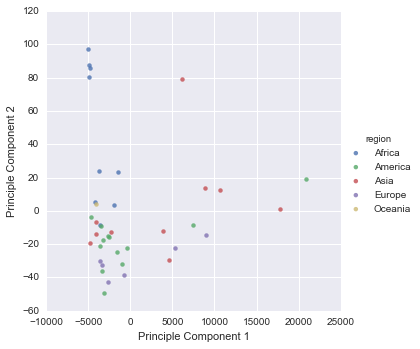

In [14]:
sns.lmplot(x="Principle Component 1", y="Principle Component 2",hue='region', data=result_df, fit_reg=False)
plt.show()


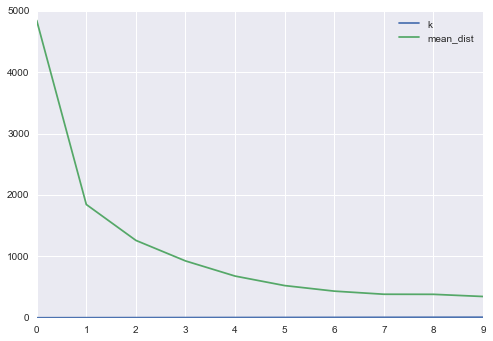

In [15]:
from scipy.cluster.vq import kmeans, vq
cluster_numbers = {}
for k in range(1,11):
    #calculate the centroids
    cendroids, _ = kmeans(X_d1_df, k)
    #assign centroids to data points
    idx, dist = vq(X_d1_df, cendroids)

    df = pd.DataFrame({'cluster':idx, 'distance':dist})
    cluster_numbers[k]=df['distance'].mean()
result = pd.DataFrame(cluster_numbers.items(), columns=['k', 'mean_dist'])
result.plot()
plt.show()

In [16]:
#from the graph we know 3 is a good k
cendroids, _=kmeans(X_d1_df, 3)
idx, dist = vq(X_d1_df, cendroids)

X_d1_df['component1_vs_component2'] = idx

In [17]:
X_d1_df.head()

,Principle Component 1,Principle Component 2,component1_vs_component2
0,-3612.684872,-8.716555,0
1,7401.365335,-8.186081,1
2,3929.359531,-11.921198,1
3,-2574.655515,-15.744226,0
4,-1503.770483,23.536464,0


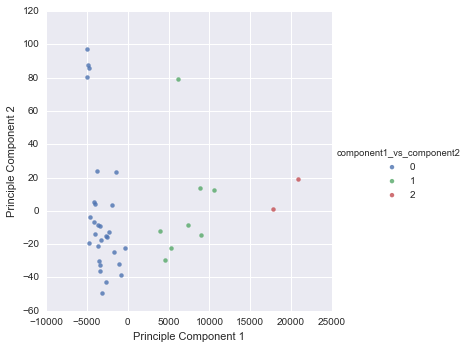

In [18]:
sns.lmplot(x="Principle Component 1", y="Principle Component 2",hue='component1_vs_component2', data=X_d1_df, fit_reg=False)
plt.show()